
# <center> Code 2: Identifying Urban and Socio-Environmental Patterns (USEPs) </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Graduate Program in Remote Sensing, National Institute for Space Research (INPE)
    <br/>
    1758, Avenida dos Astronautas, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
</div>
<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b>  This Notebook presents the methodology for identifying Urban and Socio-Environmental Patterns (USEPs). Given two shapefiles (clusters_env and clusters_urb), we perform an unsupervised classification using only the categorical variables (C_ENV and C_URB), applying the k-modes clustering algorithm. This notebook should be executed after Code 1.
</div>    

<br/>

Importing libraries:

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import normalize
from kmodes.kmodes import KModes

Reading the shapefiles with the attributes (clusters_env or clusters_urb) and creating a GeoDataFrame:

In [86]:
env = gpd.read_file("environmental_dimension/clusters_env_santarem.shp")

In [87]:
env

,ID,SN_MEAN,VN_MEAN,HND_MEAN,CA_Wa,CA_EG,CA_SV,CA_HV,PD_HV,C_ENV,geometry
0,1,-0.042412,0.803095,0.226024,-0.419488,-0.317700,0.859526,-0.679427,-0.829113,0,"POLYGON ((752288.177 9722818.283, 752288.612 9..."
1,2,0.385147,0.643596,-0.062881,-0.419488,-0.317700,0.849556,-0.679427,-0.829113,0,"POLYGON ((752388.360 9722817.848, 752388.795 9..."
2,3,0.768742,-0.268456,-0.468527,-0.419488,-0.317700,0.839590,-0.679427,-0.829113,0,"POLYGON ((752488.544 9722817.414, 752488.978 9..."
3,4,0.172079,-0.624968,-0.591165,-0.419488,-0.317700,0.829631,-0.679427,-0.829113,0,"POLYGON ((752588.727 9722816.980, 752589.162 9..."
4,5,-0.120413,-1.357845,-0.610032,-0.419488,0.341111,0.230008,-0.520606,-0.106338,0,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
...,...,...,...,...,...,...,...,...,...,...,...
13616,14651,-0.716772,0.176632,-0.718519,2.593800,-0.317700,-1.022291,-0.679427,-0.829113,5,"POLYGON ((752435.786 9733807.561, 752436.214 9..."
13617,14652,-0.875411,-0.133771,-0.817572,2.593803,-0.317700,-1.022291,-0.679427,-0.829113,5,"POLYGON ((752535.942 9733807.133, 752536.369 9..."
13618,14653,-0.975081,-0.078249,-0.817572,2.593807,-0.317700,-1.022291,-0.679427,-0.829113,5,"POLYGON ((752636.097 9733806.706, 752636.525 9..."
13619,14654,-0.852918,-0.007978,-0.753895,2.593811,-0.317700,-1.022291,-0.679427,-0.829113,5,"POLYGON ((752736.253 9733806.280, 752736.680 9..."


In [88]:
urb = gpd.read_file("urban_morphological_dimension/clusters_urb_santarem.shp")

In [89]:
urb

,ID,A_CON_MIN,CH_MAX,LCH5K_MEAN,CA_Ce,CA_HG,CA_FC,PERIOD,AREA_PERI,BUP_DENS,CA_Te,ASM_MAX,C_URB,geometry
0,5,-0.904887,7.657204,-0.565578,-0.182688,0.663551,-0.481669,-0.877458,0.668951,-1.259123,-0.947576,0.258129,0,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,-0.904887,7.657204,-0.567691,-0.273534,-0.372702,-0.737791,-0.877458,0.694571,-1.259110,-0.947576,-1.118395,0,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,-0.559015,-0.268752,-0.569704,-0.479358,-0.372702,-0.539551,-0.877458,0.747435,-1.259050,-0.947576,-0.237737,1,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,-0.559015,-0.269892,-0.569805,-0.479358,-0.372702,-0.760743,-0.877458,0.727739,-1.259021,-0.947576,2.392334,1,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,-0.586183,-0.270104,-0.569703,-0.479358,-0.372702,-0.356658,-0.877458,0.735039,-1.259008,-0.947576,1.261760,1,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,1.016402,-0.267912,-0.569805,-0.479358,-0.340505,-0.704990,-1.437618,-1.033767,-1.181086,-0.947576,-0.237737,1,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,1.023387,-0.270266,-0.569805,-0.479358,-0.372702,-0.171943,-1.507638,-1.026069,-0.976498,-0.947576,1.261760,1,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,1.023387,-0.270266,-0.569805,-0.479358,-0.372702,-0.798713,-1.507638,-1.038590,-1.286691,-0.947576,-0.063192,1,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,-0.913516,-0.270334,-0.569805,-0.479358,1.051430,-0.802306,-1.507638,-0.998392,-1.049142,-0.947576,0.400938,1,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


Defining the ID as the identifier variable of each feature:

In [90]:
indice = 'ID'

Creating a GeoDataFrame with the categorical variables 'C_URB' (urban morphological clustering result) and 'C_ENV' (environmental clustering result):

In [91]:
geom = urb[[indice, 'C_URB','geometry']].merge(env[[indice,'C_ENV']], left_on=indice, right_on=indice, how='left')

In [92]:
geom = geom[[indice, 'C_ENV', 'C_URB','geometry']]
geom

,ID,C_ENV,C_URB,geometry
0,5,0,0,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,2,0,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,1,1,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,1,1,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,0,1,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...
6296,14338,5,1,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,5,1,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,5,1,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,5,1,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


Plotting the environmental cluster map:

<AxesSubplot: >

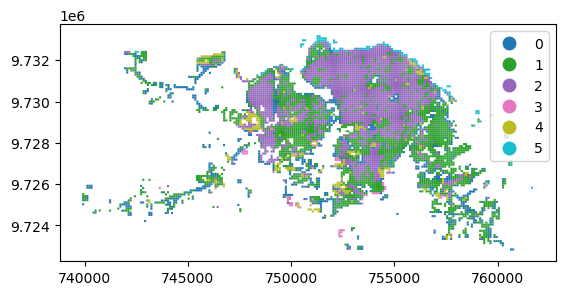

In [93]:
geom.plot(column= geom['C_ENV'], cmap='tab10',legend=True, categorical=True)

Plotting the urban morphological cluster map:

<AxesSubplot: >

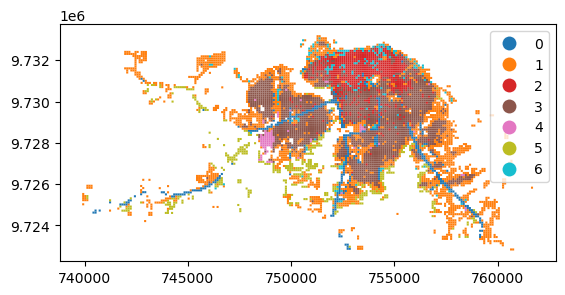

In [94]:
geom.plot(column= geom['C_URB'], cmap='tab10',legend=True, categorical=True)

In order to reduce the number of possible combinations and facilitate the identification of urban patterns, we recommend that some environmental clusters with similar characteristics in each dimension be unified. The cell below unifies clusters of similar characteristics and also reorders them (in the feature 'C_ENV_b'). 

In [95]:
# Unifying similar environmental clusters (0, 1, 3, and 4):

geom['C_ENV_b'] = np.where(geom['C_ENV'] == 4, 1, np.where(geom['C_ENV'] == 3, 1, np.where(geom['C_ENV'] == 0, 1, geom['C_ENV'])))

In [96]:
# Reordering the environmental clusters, starting from 1 to 3:

geom['C_ENV_b'] = np.where(geom['C_ENV_b'] == 5, 3,geom['C_ENV_b'])

In [97]:
geom

,ID,C_ENV,C_URB,geometry,C_ENV_b
0,5,0,0,"POLYGON ((752688.911 9722816.546, 752689.345 9...",1
1,6,2,0,"POLYGON ((752789.095 9722816.113, 752789.529 9...",2
2,10,1,1,"POLYGON ((753189.831 9722814.381, 753190.263 9...",1
3,11,1,1,"POLYGON ((753290.015 9722813.949, 753290.447 9...",1
4,12,0,1,"POLYGON ((753390.199 9722813.517, 753390.631 9...",1
...,...,...,...,...,...
6296,14338,5,1,"POLYGON ((751430.790 9733012.497, 751431.221 9...",3
6297,14339,5,1,"POLYGON ((751530.947 9733012.067, 751531.377 9...",3
6298,14340,5,1,"POLYGON ((751631.104 9733011.636, 751631.534 9...",3
6299,14392,5,1,"POLYGON ((751230.907 9733113.276, 751231.338 9...",3


Visualizing the maps of features 'C_ENV' and 'C_ENV_b':

<AxesSubplot: >

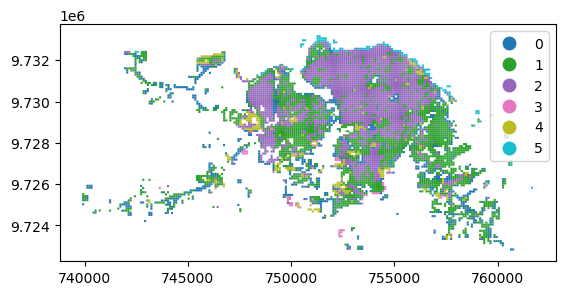

In [98]:
geom.plot(column= geom['C_ENV'], cmap='tab10',legend=True, categorical=True)

<AxesSubplot: >

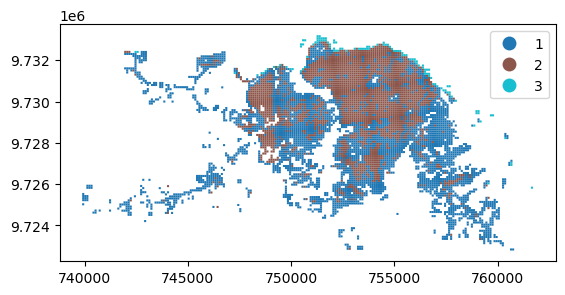

In [99]:
geom.plot(column= geom['C_ENV_b'], cmap='tab10',legend=True, categorical=True)

The same process of unifying similar clusters is applied for urban morphological clusters: 

In [100]:
# Unifying similar urban morphological clusters (6 and 2):

geom['C_URB_b'] = np.where(geom['C_URB'] == 6, 2, geom['C_URB'])

Visualizing the maps of features 'C_URB' and 'C_URB_b':

<AxesSubplot: >

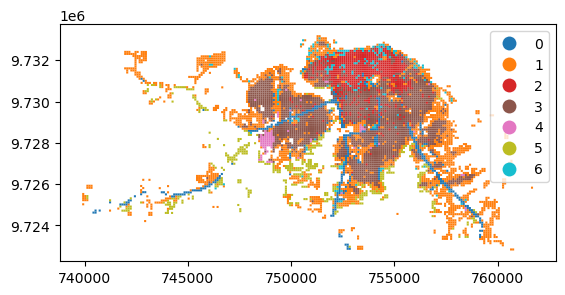

In [101]:
geom.plot(column= geom['C_URB'], cmap='tab10',legend=True, categorical=True)

<AxesSubplot: >

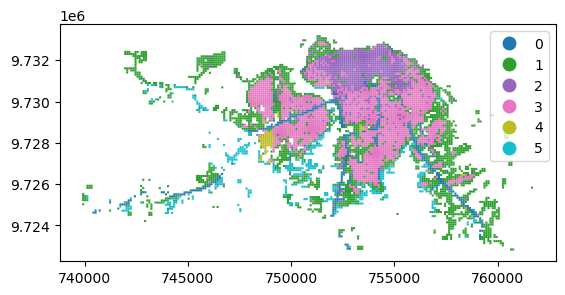

In [102]:
geom.plot(column= geom['C_URB_b'], cmap='tab10',legend=True, categorical=True)

Creating a database with the categorical variables for the unsupervised classification:

In [103]:
dados = geom[['C_ENV_b','C_URB_b']].to_numpy()
dados

array([[1, 0],
       [2, 0],
       [1, 1],
       ...,
       [3, 1],
       [3, 1],
       [3, 1]], dtype=int64)

Building the unsupervised classification model using the K-modes algorithm. One of the options, is to generate a large number of clusters to later apply a new process of joining similar clusters based on a visual analysis. For this reason, we decided to generate 12 clusters, which can later be unified.

In [104]:
km = KModes(n_clusters=12, init='Huang', n_init=300, verbose=1)
km.fit_predict(dados)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 423.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 100, cost: 395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20, cost: 412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 252.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 224.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 298, cost: 145.0
Run 6, iteration: 2/100, moves: 0, cost: 145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 1106.0
Init: initializing centroids
Init: initializing clusters
S

array([ 0, 10,  7, ...,  1,  1,  1], dtype=uint16)

Viewing the number of features in each cluster:

In [105]:
unique, counts = np.unique(km.labels_, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0  315]
 [   1  117]
 [   2  124]
 [   3   73]
 [   4 1291]
 [   5  473]
 [   6  232]
 [   7 1924]
 [   8   27]
 [   9  729]
 [  10  125]
 [  11  871]]


Including the classification result in the database:

In [114]:
geom['USEPs_b'] = km.labels_

Plotting the cluster map:

<AxesSubplot: >

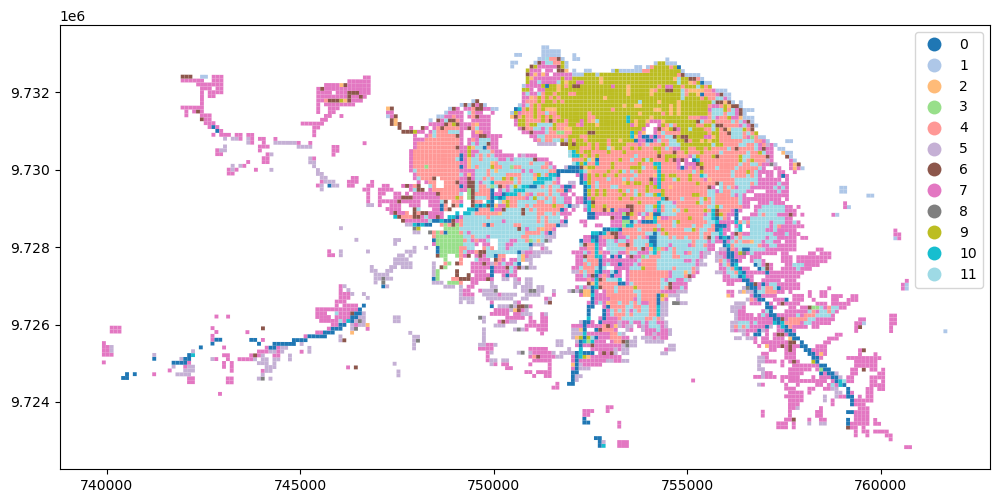

In [118]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
geom.plot(column= geom['USEPs_b'], legend=True, categorical=True, cmap = 'tab20',  ax=ax)

We recommend that a visual analysis on this first result to check if some clusters could be joined ir order to reduce variability. To do this, we recommend downloading the data and open the files in a GIS software.

In [119]:
geom.to_file("urban_socio_environmental_patterns/useps_santarem_b.shp")

After prior analysis, we decided to join some similar clusters:

In [125]:
# Unifying similar USEPs:

geom['USEPs'] = np.where(geom['USEPs_b'] == 1, 1, None) #USEP-1
geom['USEPs'] = np.where(geom['USEPs_b'] == 11, 2, geom['USEPs']) #USEP-2
geom['USEPs'] = np.where(geom['USEPs_b'] == 8, 3, np.where(geom['USEPs_b'] == 7, 3, np.where(geom['USEPs_b'] == 6, 3, np.where(geom['USEPs_b'] == 5, 3, geom['USEPs'])))) #USEP-3
geom['USEPs'] = np.where(geom['USEPs_b'] == 8, 3, np.where(geom['USEPs_b'] == 7, 3, np.where(geom['USEPs_b'] == 6, 3, np.where(geom['USEPs_b'] == 5, 3, geom['USEPs'])))) #USEP-4
geom['USEPs'] = np.where(geom['USEPs_b'] == 9, 4, geom['USEPs']) #USEP-4
geom['USEPs'] = np.where(geom['USEPs_b'] == 0, 5, np.where(geom['USEPs_b'] == 10, 5, geom['USEPs'])) #USEP-5
geom['USEPs'] = np.where(geom['USEPs_b'] == 4, 6, geom['USEPs']) #USEP-6
geom['USEPs'] = np.where(geom['USEPs_b'] == 3, 7, geom['USEPs']) #USEP-7

Plotting the USEPs map after join similar clusters:

c:\Users\brdia\anaconda3\envs\environment\lib\site-packages\geopandas\plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


<AxesSubplot: >

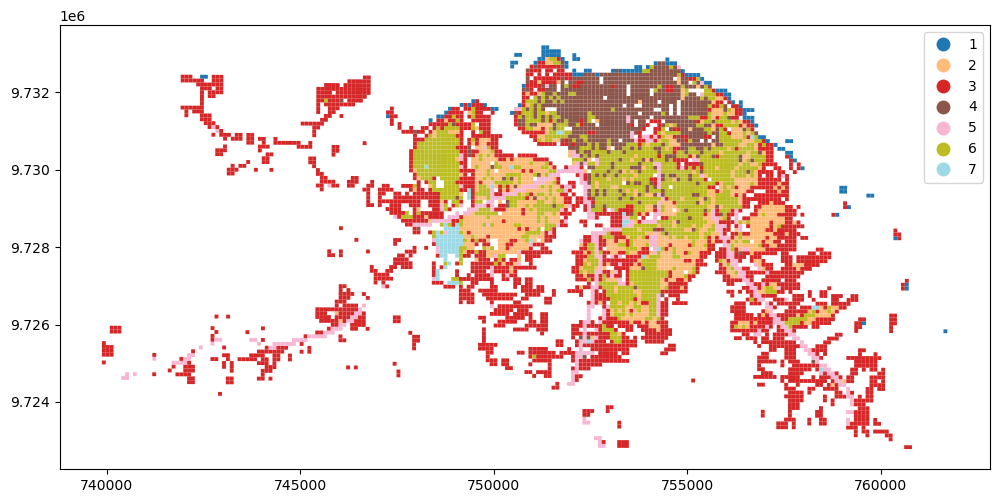

In [126]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
geom.plot(column= geom['USEPs'], legend=True, categorical=True, cmap = 'tab20',  ax=ax)

Viewing the final database and exporting a shapefile:

In [128]:
geom

,ID,C_ENV,C_URB,geometry,C_ENV_b,C_URB_b,USEPs_b,USEPs
0,5,0,0,"POLYGON ((752688.911 9722816.546, 752689.345 9...",1,0,0,5
1,6,2,0,"POLYGON ((752789.095 9722816.113, 752789.529 9...",2,0,10,5
2,10,1,1,"POLYGON ((753189.831 9722814.381, 753190.263 9...",1,1,7,3
3,11,1,1,"POLYGON ((753290.015 9722813.949, 753290.447 9...",1,1,7,3
4,12,0,1,"POLYGON ((753390.199 9722813.517, 753390.631 9...",1,1,7,3
...,...,...,...,...,...,...,...,...
6296,14338,5,1,"POLYGON ((751430.790 9733012.497, 751431.221 9...",3,1,1,1
6297,14339,5,1,"POLYGON ((751530.947 9733012.067, 751531.377 9...",3,1,1,1
6298,14340,5,1,"POLYGON ((751631.104 9733011.636, 751631.534 9...",3,1,1,1
6299,14392,5,1,"POLYGON ((751230.907 9733113.276, 751231.338 9...",3,1,1,1


In [129]:
#geom.to_file("urban_morphological_dimension/useps_santarem.shp")